In [8]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [9]:
dataset = pd.read_csv('train13519.csv')
np_array = dataset.iloc[:,:].values

### Adding derived parameters

In [10]:
day_of_week = []
month = []
for i in range(len(np_array)):
    #Getting the day of week for detecting weekends
    day = datetime.datetime.strptime(np_array[i][0], '%Y-%m-%d %H:%M:%S').strftime('%a')
    day_of_week.append(day)  
    #Getting the month for vacation times
    mon = int(datetime.datetime.strptime(np_array[i][0], '%Y-%m-%d %H:%M:%S').strftime('%m'))
    month.append(mon)

In [11]:
dataset['day'] = day_of_week
dataset['month'] = month

In [12]:
rev_data = dataset.iloc[:,1:].values

In [13]:
#Importing the preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [14]:
#Converting categorical to numerical data
enc1 = LabelEncoder()
rev_data[:,1] = enc1.fit_transform(rev_data[:,1]) 
one_hot_encoder = OneHotEncoder(categorical_features=[1,2])
rev_data = one_hot_encoder.fit_transform(rev_data).toarray()

#Scaling the values
scl = MinMaxScaler()
rev_data[:,-1] = scl.fit_transform(rev_data[:,-1].reshape(-1,1)).reshape(-1)


In [15]:
rev_data.shape

(26496, 12)

In [16]:
#Creating X and Y dataset

X = rev_data[0:-1,:]
Y = rev_data[1:,-1]
#Creating test and train dataset
X = X.reshape(X.shape[0],1,X.shape[1])
X_train = X[:-25000,:]
Y_train = Y[:-25000]
X_test = X[25000:,:]
Y_test = Y[25000:]



In [17]:
#Displaying the converted dataset 
X

array([[[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.024]],

       [[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.096]],

       [[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.032]],

       ..., 
       [[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.072]],

       [[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.056]],

       [[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.104]]])

In [2]:
#Importing neural nets libraries
import keras

Using TensorFlow backend.


In [14]:
#Creating the network structure
model = keras.models.Sequential()
model.add(keras.layers.LSTM(1024,input_shape=(X.shape[1], X.shape[2])))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))
#Building the model
model.compile(optimizer='adam',loss = 'mae')

In [15]:
#Checking the summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1024)              4247552   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 4,248,577
Trainable params: 4,248,577
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Training model (dont run this again)
model.fit(X,Y,20,10)

Epoch 1/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0495
Epoch 2/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0437
Epoch 3/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0416
Epoch 4/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0404
Epoch 5/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0391
Epoch 6/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0380
Epoch 7/10
26495/26495 [==============================] - 100s 4ms/step - loss: 0.0371
Epoch 8/10
26495/26495 [==============================] - 102s 4ms/step - loss: 0.0366
Epoch 9/10
26495/26495 [==============================] - 102s 4ms/step - loss: 0.0362
Epoch 10/10
26495/26495 [==============================] - 102s 4ms/step - loss: 0.0358


In [36]:
##Saving the model
json = model.to_json()
with open('Forecast_model.json','w') as f:
    f.write(json)
#Saving the weights
model.save_weights('model_weights.h5')

In [18]:
with open("Forecast_model.json",'r') as f:
    model = keras.models.model_from_json(f.read())
model.load_weights("model_weights.h5")

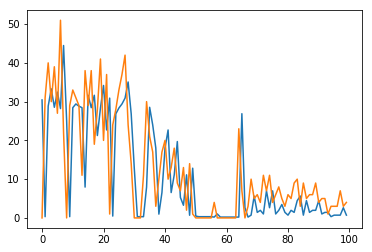

In [21]:
#Showing the forecast
plt.plot(scl.inverse_transform(model.predict(X_test))[:100])
plt.plot(scl.inverse_transform(Y_test.reshape(-1,1))[:100])
plt.show()

In [ ]:
#Comparison with Mean -- Deviation from Ideal
plt.plot(scl.inverse_transform(model.predict(X_test))[:100])
plt.plot(scl.inverse_transform(np.array([Y.mean()]*100).reshape(-1, 1)))
plt.show()